<center> <b> <font size="+2"> SME0828 - Introdução à Ciência de Dados - Projeto 2 </font> </b> </center>

<center> <i> Danilo Augusto Ganancin Faria - Nº USP: 9609172 </i> </center>

<center> 04 de outubro de 2020 </center>

Antes de iniciar a resolução dos exercícios é necessário limpar as variáveis e também carregar as bibliotecas que serão utilizadas.

In [1]:
# Limpando as variáveis
from IPython import get_ipython
get_ipython().magic('reset -sf') 

In [2]:
# Realizando importação das bibliotecas
import os
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
from matplotlib import pyplot as plt
from scipy import stats
from scipy.stats import iqr, poisson, pearsonr, spearmanr
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Math, Latex
from IPython.core.display import Image

In [3]:
# Configurando o alinhamento dos gráficos 
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

## Exercício 1
Gere dados a partir de uma distribuição de Poisson($\lambda$). Varie as taxas $\lambda$ no intervalo [1, 10] e mostre o gráfico da média em função da variância.

Sabe-se que uma variável aleatória discreta $X$ segue a distribuição de *Poisson* com parâmetro $\lambda$, $\lambda > 0$, se sua função de probabilidade é dada por:

$$
\mathbb{P}(X = x) = \dfrac{\exp^{-\lambda}\lambda^{k}}{k!}.
$$

Denota-se, $X \sim Poisson(\lambda)$, em que o parâmetro $\lambda$ indica a taxa de ocorrência por unidade medida.

In [4]:
# Criando uma lista para armazenar os valores da Poisson(lambda)
lista = []

for i in range(1, 11):
  lista.append(poisson.rvs(mu = i, size = 10))

In [5]:
# Criando uma lista para armazenar as médias da Poisson(lambda)
media = []

for i in range(0, 10):
  media.append(np.mean(lista[i]))

In [6]:
# Criando uma lista para armazenar as variâncias da Poisson(lambda)
variancia = []

for i in range(0, 10):
  variancia.append(np.var(lista[i]))

In [7]:
print("As médias dos dados gerados são: \n", media)
print("As variância dos dados gerados são: \n", variancia)

As médias dos dados gerados são: 
 [1.3, 2.3, 3.5, 4.3, 4.6, 5.0, 7.8, 8.1, 10.2, 10.0]
As variância dos dados gerados são: 
 [0.8099999999999999, 3.0100000000000002, 6.45, 3.0100000000000007, 2.84, 9.4, 13.16, 4.69, 6.159999999999999, 9.2]


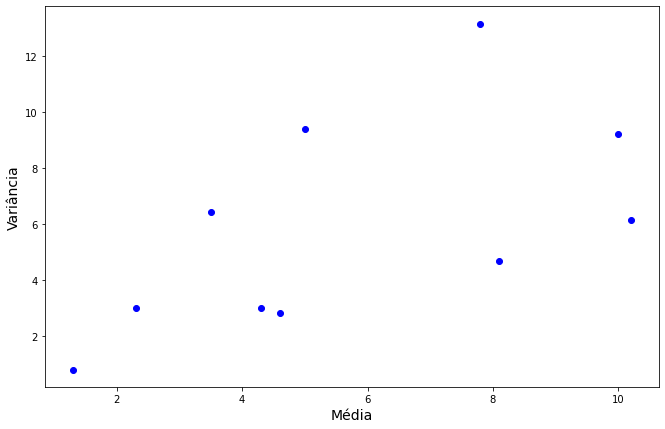

In [8]:
# Gráfico da média em função da variância
fig = plt.figure(figsize = (11, 7))
plt.scatter(media, variancia, marker = 'o', color = 'blue');
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel("Média", fontsize = 14) 
plt.ylabel("Variância", fontsize = 14) 
plt.show(True)

É de conhecimento, que a distribuição de $Poisson(\lambda), \; \lambda > 0$ possui uma propriedade bem peculiar em que $\mathbb{E}[X] = Var(X)$, $X$ variável aleatória discreta, ou seja, a média da distribuição de $Poisson(\lambda)$ é igual a sua variância. 

Dessa forma, no gráfico acima caso os valores não fossem gerados de forma aleatória, era de se esperar que teríamos uma reta onde $Média = Variância$, por este fato o correto é ter uma reta que seja o mais próximo possível disso, pois cada vez que o código é executado valores diferentes são gerados.

## Exercício 2
Considere os dados da Iris. Calcule a média, variância e IQR para cada atributo.

In [9]:
# Leitura do arquivo do conjunto de dados 
iris = pd.read_csv('iris.csv', header = (0))
print('Este conjunto de dados possui {} linhas e {} colunas.'.format(iris.shape[0], iris.shape[1]))

Este conjunto de dados possui 150 linhas e 5 colunas.


In [10]:
# Mostra as primeiras 5 linhas do conjunto de dados
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:
# Cálculo da média dos atributos
print("A média dos atributos são: \n", iris.mean())

A média dos atributos são: 
 sepal_length    5.843333
sepal_width     3.054000
petal_length    3.758667
petal_width     1.198667
dtype: float64


O atributo com maior média é *sepal_length*, pode ser que este atributo possui algumas observações com valores discrepantes das demais observações.

In [12]:
# Cálculo da variância dos atributos
print("A variância dos atributos são: \n", iris.var())

A variância dos atributos são: 
 sepal_length    0.685694
sepal_width     0.188004
petal_length    3.113179
petal_width     0.582414
dtype: float64


O atributo de maior variância é *petal_length*, ou seja, este atributo possui observações com valores mais distantes em relação à média deste atributo.

In [13]:
# Cálculo do IQR dos atributos
print("O IQR dos atributos são: \n", iris.quantile(0.75) - iris.quantile(0.25))

O IQR dos atributos são: 
 sepal_length    1.3
sepal_width     0.5
petal_length    3.5
petal_width     1.5
dtype: float64


O atributo com maior IQR é *petal_length*, pode ser um indicativo da presença de *outliers* neste atributo.

## Exercício 3
Obtenha o *boxplot* de todas as variáveis da flor Iris, para cada espécie.


In [14]:
# Leitura do arquivo do conjunto de dados
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Os dados da Iris são compostos por quatro variáveis a saber: *sepal_length*, *sepal_width*, *petal_length* e *petal_width*. A seguir são feitos os *boxplots* considerando cada um dessas variáveis.

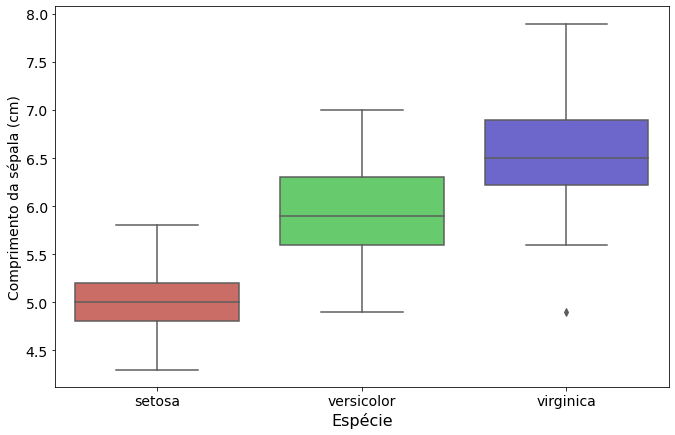

In [15]:
# Boxplot do comprimento da sépala x espécie
plt.figure(figsize = (11, 7))
sns.boxplot(x = "species", y = "sepal_length", data = iris, palette = "hls")
plt.xlabel('Espécie', fontsize = 16)
plt.ylabel('Comprimento da sépala (cm)', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show(True)

É possível observar que para o comprimento da sépala há um possível *outlier* da espécie virgínica.

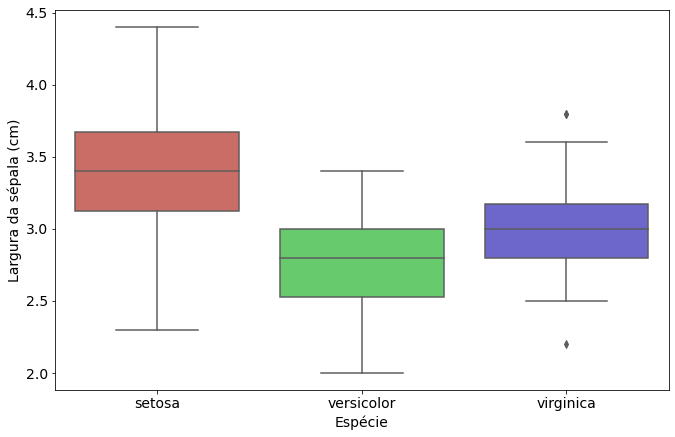

In [16]:
# Boxplot da largura da sépala x espécie
plt.figure(figsize = (11, 7))
sns.boxplot(x = "species", y = "sepal_width", data = iris, palette = "hls")
plt.xlabel('Espécie', fontsize = 14)
plt.ylabel('Largura da sépala (cm)', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show(True)

Considerando a largura da sépala, assim como no caso anterior, há dois possíveis *outliers* da espécie virgínica.

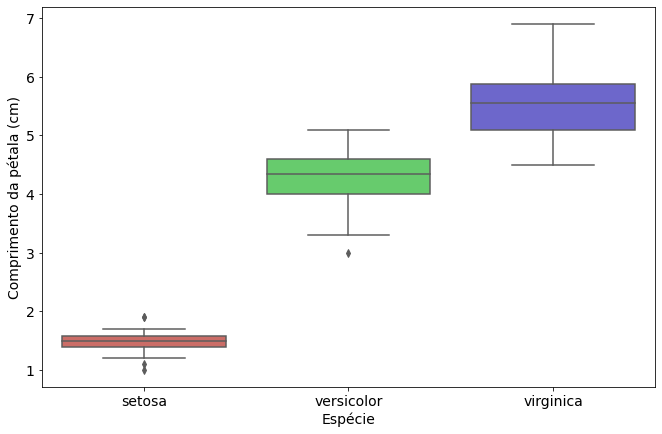

In [17]:
# Boxplot do comprimento da pétala x espécie
plt.figure(figsize = (11, 7))
sns.boxplot(x = "species", y = "petal_length", data = iris, palette = "hls")
plt.xlabel('Espécie', fontsize = 14)
plt.ylabel('Comprimento da pétala (cm)', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show(True)

Neste caso, há a ocorrência de possíveis *outliers* nas espécies setosa e versicolor.

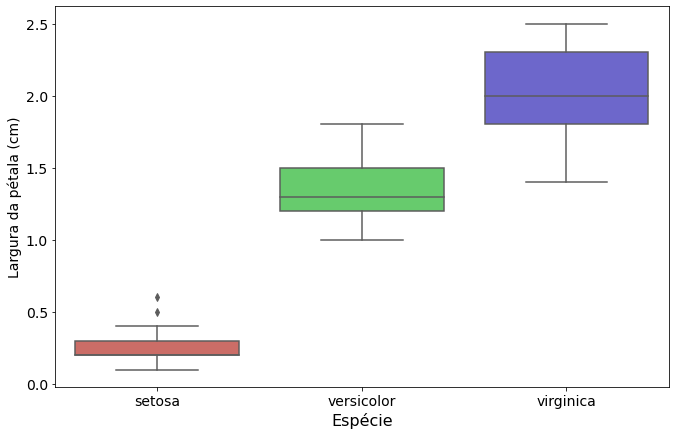

In [18]:
# Boxplot da largura da pétala x espécie
plt.figure(figsize = (11, 7))
sns.boxplot(x = "species", y = "petal_width", data = iris, palette = "hls")
plt.xlabel('Espécie', fontsize = 16)
plt.ylabel('Largura da pétala (cm)', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show(True)

Para a largura da pétala, há dois possívies *outliers* da espécie setosa.

## Exercício 4
Para a função $\log()$, investigue como as correlações de Pearson e Spearman variam de acordo com o intervalo dos dados.

In [19]:
# Visualizando as colunas do conjunto de dados
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [20]:
# Separando e indexando os dados de cada coluna do conjunto de dados
dados1 = iris.iloc[:, 0]
dados2 = iris.iloc[:, 1]
dados3 = iris.iloc[:, 2]
dados4 = iris.iloc[:, 3]

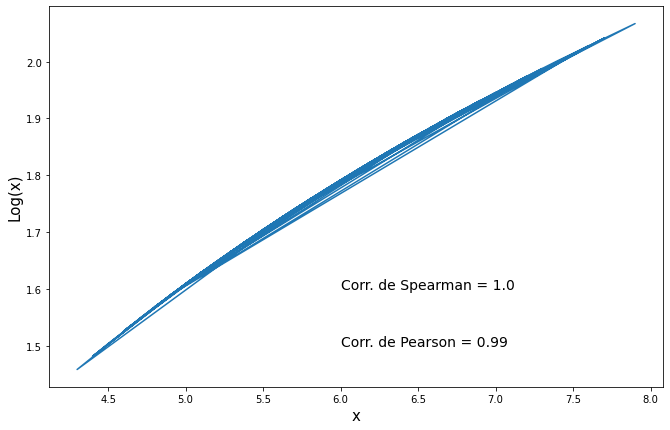

In [21]:
# Correlações de Pearson e Spearman para o logarítmo da variável sepal_length
x1 = dados1
z1 = np.log(x1)

plt.figure(figsize = (11, 7))
plt.plot(x1, z1)
plt.xlabel("x", fontsize = 15) 
plt.ylabel("Log(x)", fontsize = 15) 
corr, p_value = pearsonr(x1, z1)
corrs, p_values = spearmanr(x1, z1)
corr = int(corr * 100) / 100
corrs = int(corrs * 100) / 100
string = 'Corr. de Pearson = '+ str(corr)
plt.text(6, 1.5, string, fontsize = 14)
string = 'Corr. de Spearman = '+ str(corrs)
plt.text(6, 1.6, string, fontsize = 14)
plt.show()

É perceptível neste caso a relação linear entre $x$ e $Log(x)$, dessa forma, os coeficientes de correlação de Pearson e Spearman terão valores bastante próximos como mostra a figura acima.

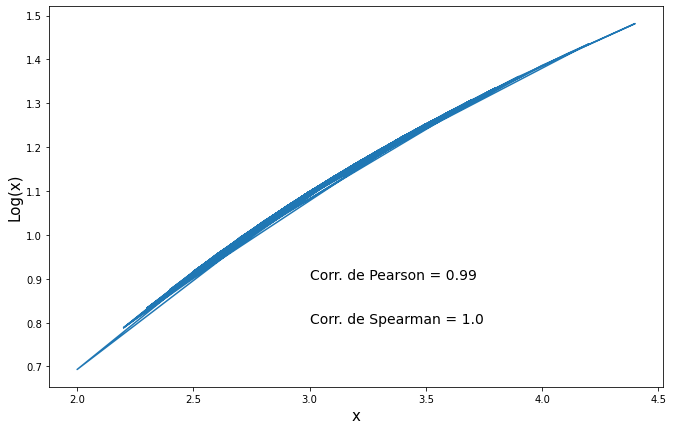

In [22]:
# Correlações de Pearson e Spearman para o logarítmo da variável sepal_width
x2 = dados2
z2 = np.log(x2)

plt.figure(figsize = (11, 7))
plt.plot(x2, z2) 
plt.xlabel("x", fontsize = 15) 
plt.ylabel("Log(x)", fontsize = 15) 
corr, p_value = pearsonr(x2, z2)
corrs, p_values = spearmanr(x2, z2)
corr = int(corr * 100) / 100
corrs = int(corrs * 100) / 100
string = 'Corr. de Pearson = '+ str(corr)
plt.text(3, 0.9, string, fontsize = 14)
string = 'Corr. de Spearman = '+ str(corrs)
plt.text(3, 0.8, string, fontsize = 14)
plt.show()

Assim como no caso anterior, pelo fato de $x$ ter uma relação linear com $Log(x)$, é esperado que os coeficientes de correlação de Pearson e Spearman tenham valores próximos.

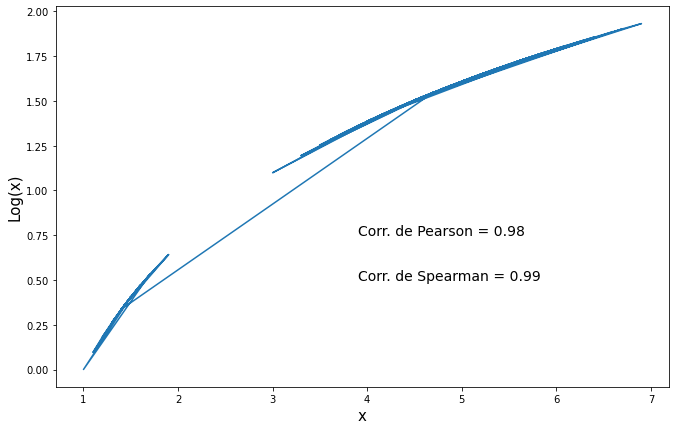

In [23]:
# Correlações de Pearson e Spearman para o logarítmo da variável petal_length
x3 = dados3
z3 = np.log(x3)

plt.figure(figsize = (11, 7))
plt.plot(x3, z3) 
plt.xlabel("x",fontsize = 15) 
plt.ylabel("Log(x)", fontsize = 15) 
corr, p_value = pearsonr(x3, z3)
corrs, p_values = spearmanr(x3, z3)
corr = int(corr * 100) / 100
corrs = int(corrs * 100) / 100
string = 'Corr. de Pearson = '+ str(corr)
plt.text(3.9, 0.75, string, fontsize = 14)
string = 'Corr. de Spearman = '+ str(corrs)
plt.text(3.9, 0.5, string, fontsize = 14)
plt.show()

Neste caso, apesar da relação entre $x$ e $Log(x)$ ainda ser linear, os valores das correlações de Pearson e Spearman estão próximos porém sutilmente menores.

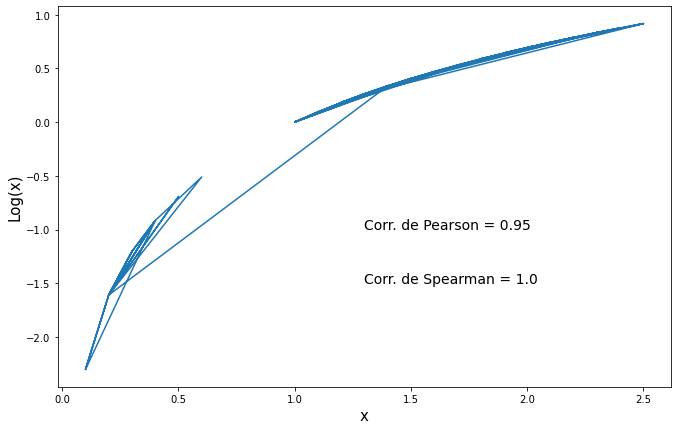

In [24]:
# Correlações de Pearson e Spearman para o logarítmo da variável petal_width
x4 = dados4
z4 = np.log(x4)

plt.figure(figsize = (11, 7))
plt.plot(x4, z4) 
plt.xlabel("x", fontsize = 15) 
plt.ylabel("Log(x)", fontsize = 15) 
corr, p_value = pearsonr(x4, z4)
corrs, p_values = spearmanr(x4, z4)
corr = int(corr * 100) / 100
corrs = int(corrs * 100) / 100
string = 'Corr. de Pearson = '+ str(corr)
plt.text(1.3, -1, string, fontsize = 14)
string = 'Corr. de Spearman = '+ str(corrs)
plt.text(1.3, -1.5, string, fontsize = 14)
plt.show()

Como nos casos anteriores, as correlações de Pearson e Spearman possuem valores próximos devido a existência da relação linear entre $x$ e $Log(x)$. Aqui nota-se uma sutil mudança no crescimento da função que é perceptível pelo valor de 0,95 do coeficiente de correlação de Pearson que é mais sensível a este tipo de mudanças.

## Exercício 5
Considere o código nas notas de aula que mostra como a correlação de Pearson muda com a inclusão de ruídos. Modifique a função para $Y = 0,5 * X + ruído$. Varie o ruído e calcule os coeficientes de Pearson e Spearman, mostrando os respectivos *scatterplots* com os valores dos coeficientes (como feito no exemplo).

 - Coeficiente de Correlação de Pearson

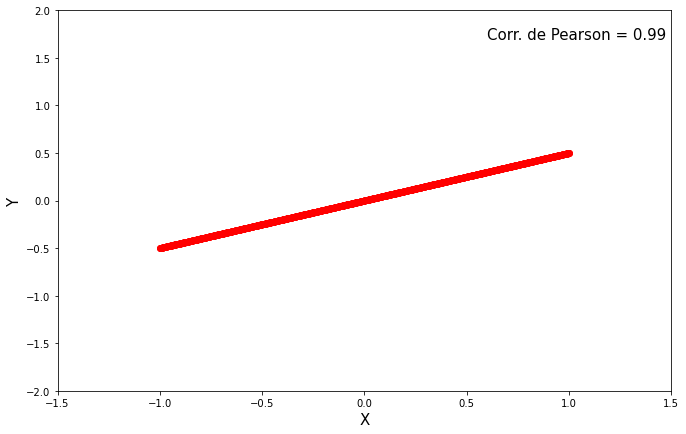

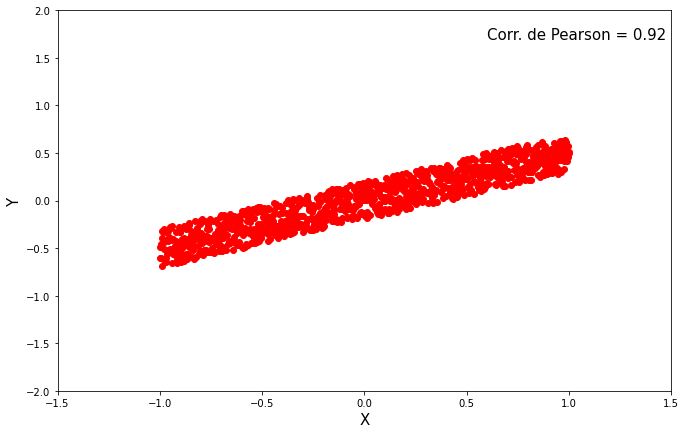

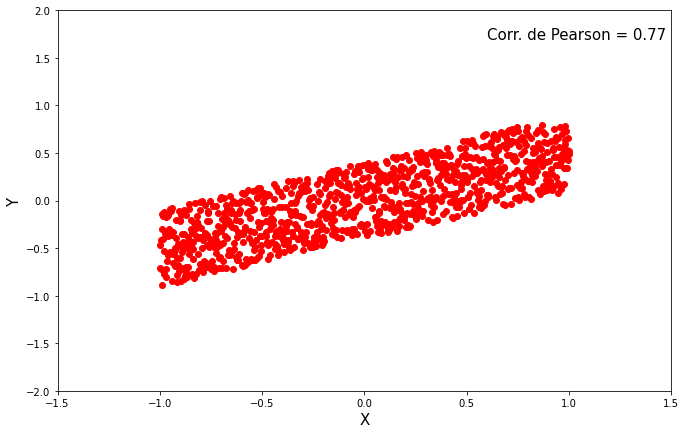

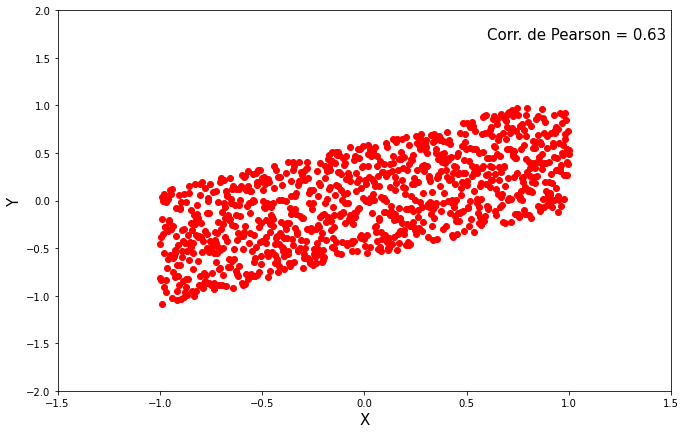

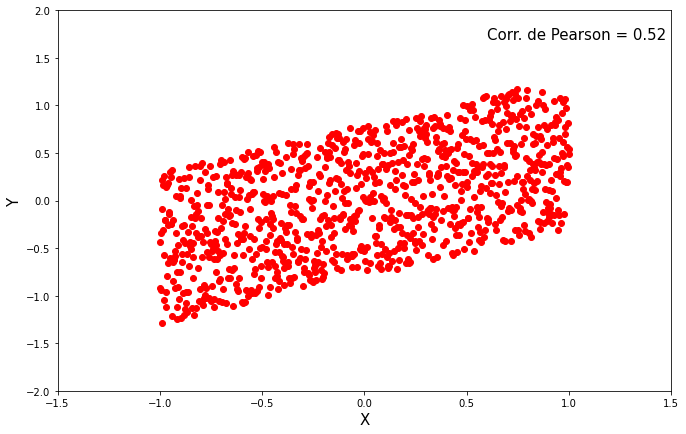

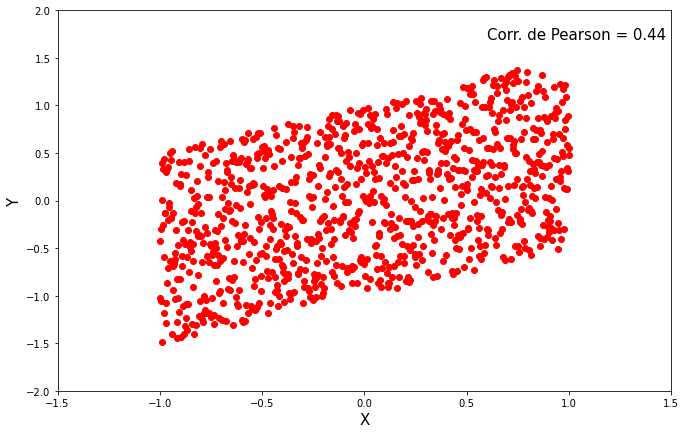

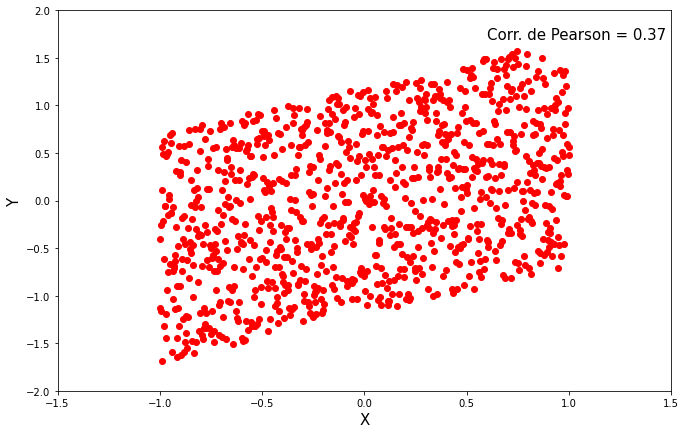

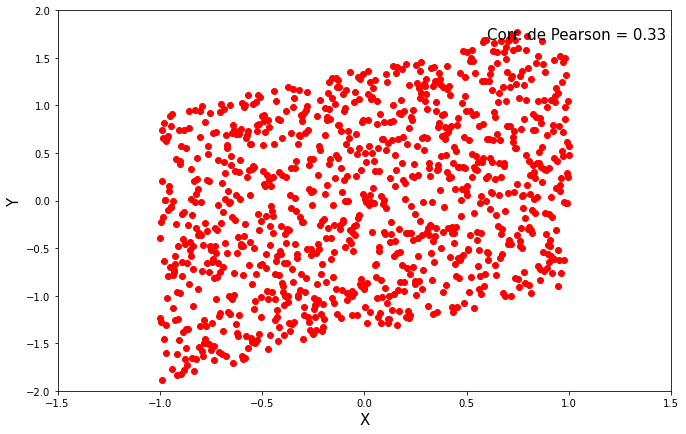

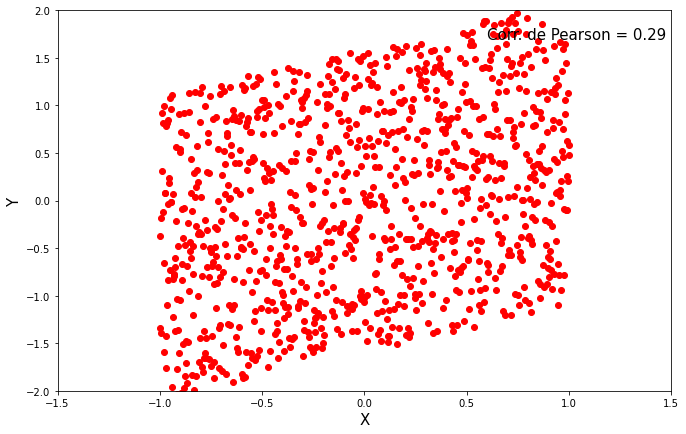

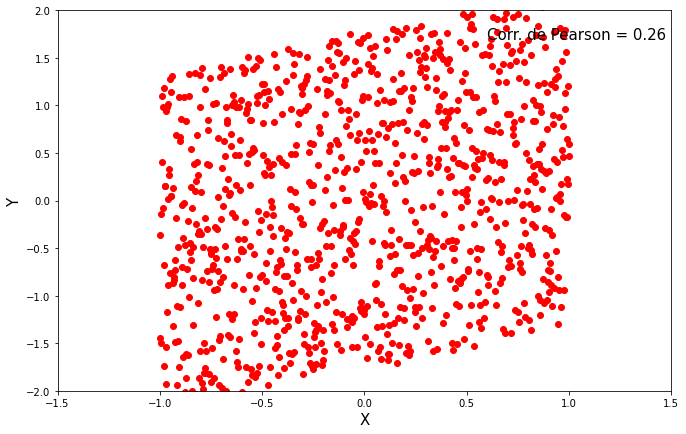

In [25]:
# Correlação de Pearson
N = 1000
X = np.linspace(-1, 1, N)
erro = np.random.uniform(-1, 1, N) # ruído a ser incluído na relação linear.
for sigma in np.arange(0, 2, 0.2):
    Y = 0.5 * X + erro * sigma
    plt.figure(figsize = (11, 7))
    plt.plot(X, Y, 'ro')
    plt.xlabel("X", fontsize = 15) 
    plt.ylabel("Y", fontsize = 15) 
    corr, p_value = pearsonr(X, Y) # calcula a correlação
    corr = int(corr * 100) / 100
    string = 'Corr. de Pearson = '+ str(corr)
    plt.xlim(-1.5, 1.5)
    plt.ylim(-2, 2)
    plt.text(0.6, 1.7, string, fontsize = 15)
    plt.show(True)

Percebe-se que de acordo com que o ruído vai aumentando, o coeficiente de correlação de Pearson vai diminuindo gradativamente, o que já era esperado por medir a correlação linear entre $X$ e $Y$ que é afetada diretamente pelo ruído.

 - Coeficiente de Correlação de Spearman

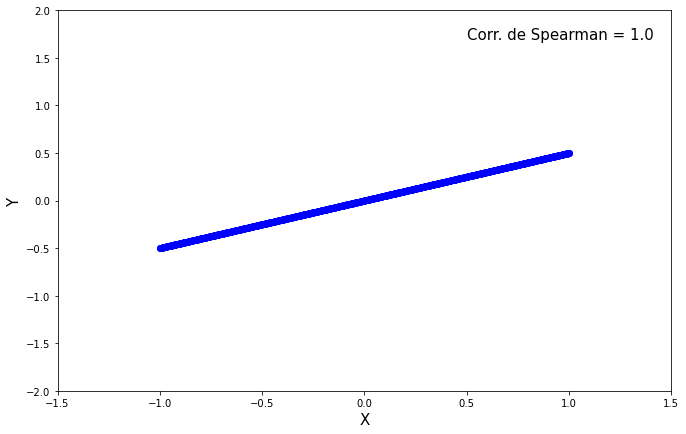

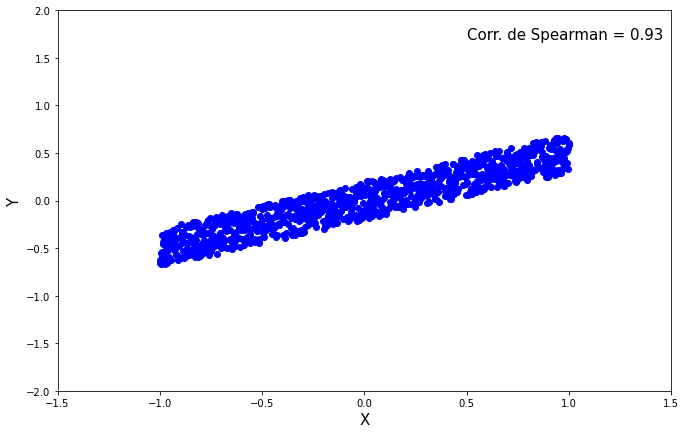

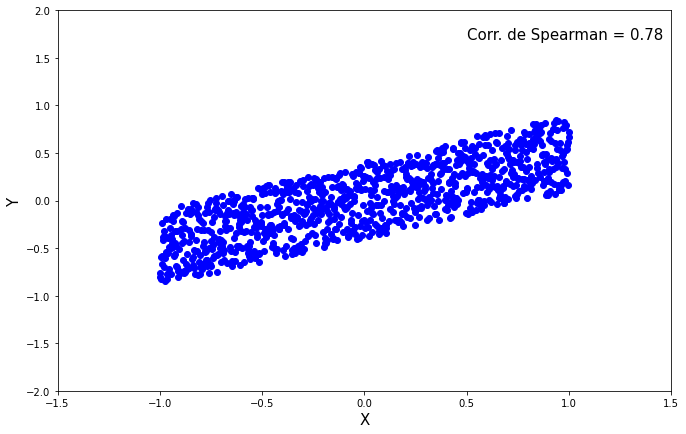

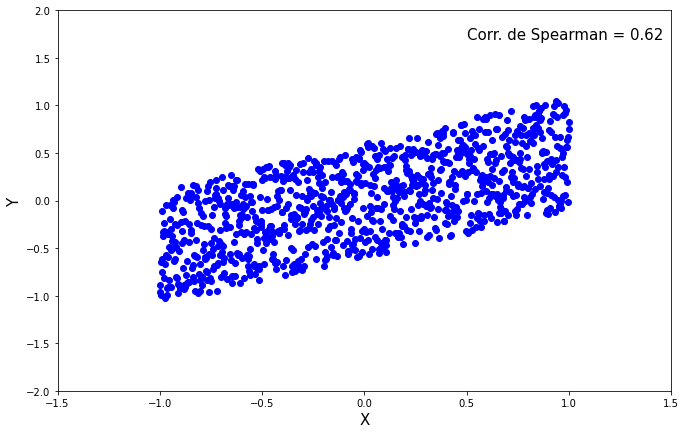

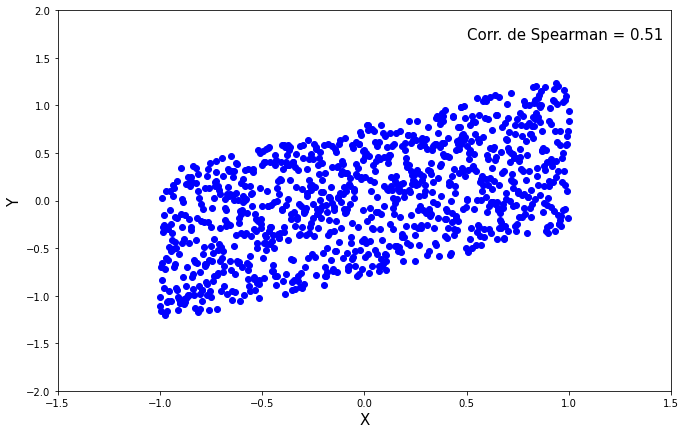

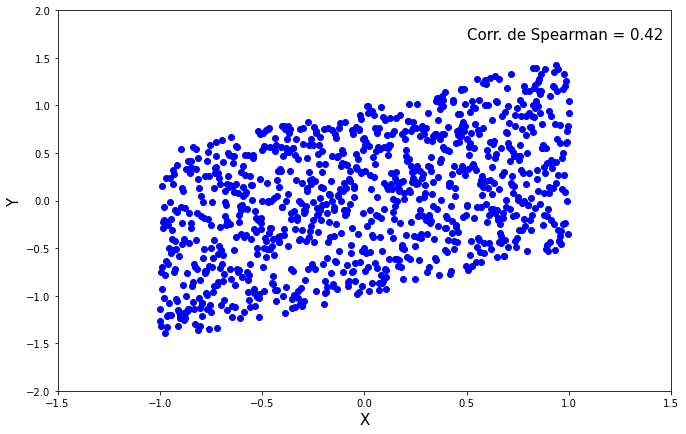

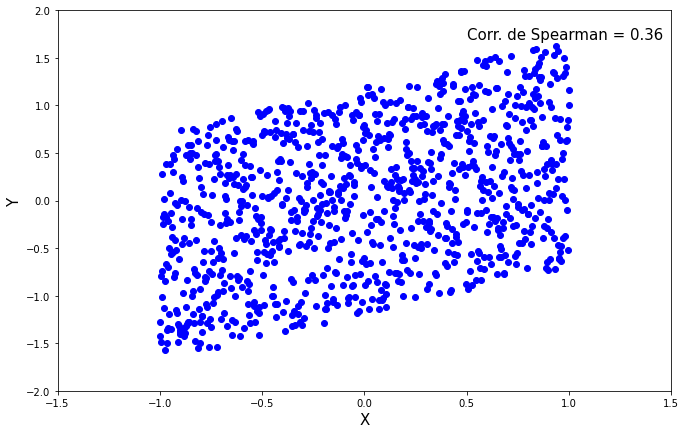

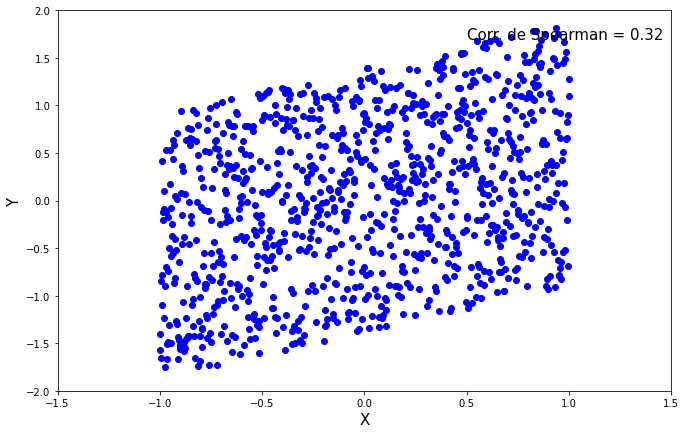

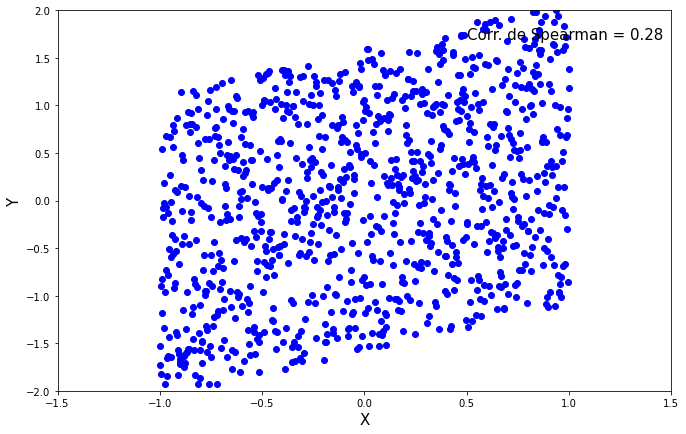

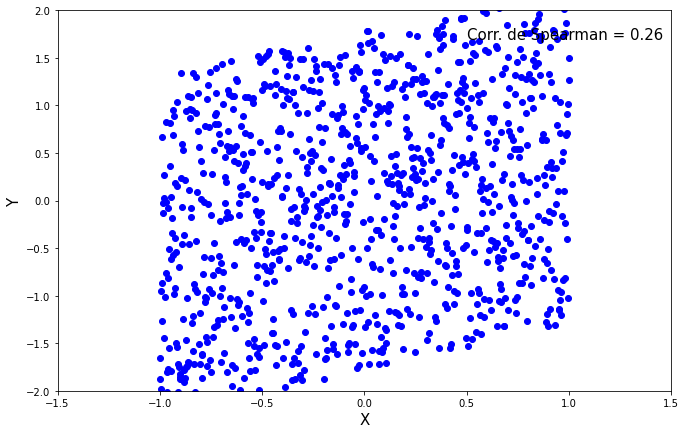

In [26]:
# Correlação de Spearman
N = 1000
X = np.linspace(-1, 1, N)
erro = np.random.uniform(-1, 1, N) # ruído a ser incluído na relação linear
for sigma in np.arange(0, 2, 0.2):
    Y = 0.5 * X + erro * sigma
    plt.figure(figsize = (11, 7))
    plt.plot(X, Y, 'bo')
    plt.xlabel("X", fontsize = 15) 
    plt.ylabel("Y", fontsize = 15) 
    corrs, p_values = spearmanr(X, Y)
    corrs = int(corrs * 100) / 100
    string = 'Corr. de Spearman = '+ str(corrs)
    plt.xlim(-1.5, 1.5)
    plt.ylim(-2, 2)
    plt.text(0.5, 1.7, string, fontsize = 15)
    plt.show(True)

De forma semelhante, o coeficiente de correlação de Spearman também vai diminuindo conforme o ruído aumenta, porém por ser aplicado aos valores da ordem das observações, por não ser sensível aos *outliers* e nem às distribuições assimétricas, seu valor diminui de forma mais lenta. 

## Exercício 6
Considere os dados a seguir, chamado quarteto de Ascomb. Calcule a média, variância, correlação de Pearson e Spearman entre as variáveis $x$ e $y$. O que você pode dizer sobre esses dados?

In [27]:
# Quarteto de Ascomb
x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

# Armazenando os dados em uma matriz
ascomb = [[x, "x"], [y1, "y1"], [y2, "y2"], [y3, "y3"], [x4, "x4"], [y4, "y4"]]
n = len(ascomb)

In [28]:
# Cálculando as médias
i = 0
for i in range (0, n):
    m = round(np.mean(ascomb[i][0]), 2)
    print("A média de {} é: {}".format(ascomb[i][1], m))

A média de x é: 9.0
A média de y1 é: 7.5
A média de y2 é: 7.5
A média de y3 é: 7.5
A média de x4 é: 9.0
A média de y4 é: 7.5


Veja que as médias de $x$ e $x4$ são iguais a $9$, e as médias de $y1$, $y2$, $y3$ e $y4$ são todas iguais a $7,5$.  

In [29]:
# Calculando as variâncias
i = 0
for i in range (0, n):
    v = round(np.var(ascomb[i][0]), 2)
    k = len(ascomb[i][0])
    v = v * (k / (k - 1))
    print("A variância de {} é: {} ".format(ascomb[i][1], v))

A variância de x é: 11.0 
A variância de y1 é: 4.125 
A variância de y2 é: 4.125 
A variância de y3 é: 4.125 
A variância de x4 é: 11.0 
A variância de y4 é: 4.125 


Note que, $x$ e $x4$ possuem variância iguais a $11$, e $y1$, $y2$, $y3$ e $y4$ possuem variância iguais a $4,125$. 

In [30]:
# Calculando as correlações de Pearson
for i in range (1, n - 2):
    cp, pp = pearsonr(ascomb[0][0], ascomb[i][0])
    cp = round(cp, 2)
    pp = round(pp, 2)
    print("A correlação de Pearson entre {} e {} é: {} ".format(ascomb[0][1], ascomb[i][1], cp))
    
for i in range (5, n):
    cp, pp = pearsonr(ascomb[4][0], ascomb[i][0])
    cp = round(cp, 2)
    pp = round(pp, 2)
    print("A correlação de Pearson entre {} e {} é: {} ".format(ascomb[4][1], ascomb[i][1], cp))

A correlação de Pearson entre x e y1 é: 0.82 
A correlação de Pearson entre x e y2 é: 0.82 
A correlação de Pearson entre x e y3 é: 0.82 
A correlação de Pearson entre x4 e y4 é: 0.82 


In [31]:
# Calculando as correlações de Spearman
for i in range (1, n - 2):
    cs, ps = spearmanr(ascomb[0][0], ascomb[i][0])
    cs = round(cs, 2)
    ps = round(ps, 2)
    print("A correlação de Spearmanr entre {} e {} é: {} ".format(ascomb[0][1], ascomb[i][1], cs))
    
for i in range (5, n):
    cs, ps = spearmanr(ascomb[4][0], ascomb[i][0])
    cs = round(cp, 2)
    ps = round(pp, 2)
    print("A correlação de Spearmanr entre {} e {} é: {} ".format(ascomb[4][1], ascomb[i][1], cs))

A correlação de Spearmanr entre x e y1 é: 0.82 
A correlação de Spearmanr entre x e y2 é: 0.69 
A correlação de Spearmanr entre x e y3 é: 0.99 
A correlação de Spearmanr entre x4 e y4 é: 0.82 


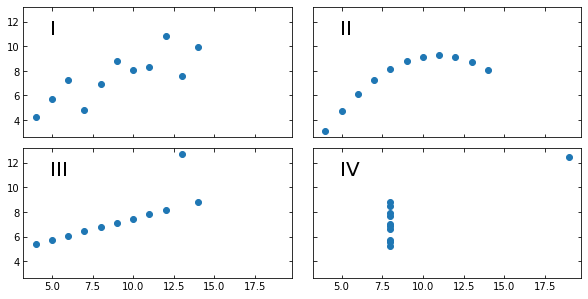

In [32]:
# Visualização do Quarteto de Ascomb
datasets = {
    'I': (x, y1),
    'II': (x, y2),
    'III': (x, y3),
    'IV': (x4, y4)
}

fig, axs = plt.subplots(2, 2, sharex = True, sharey = True, figsize = (10, 5),
                        gridspec_kw = {'wspace': 0.08, 'hspace': 0.08})

for ax, (label, (x, y)) in zip(axs.flat, datasets.items()):
    ax.text(0.1, 0.9, label, fontsize = 20, transform = ax.transAxes, va = 'top')
    ax.tick_params(direction = 'in', top = True, right = True)
    ax.plot(x, y, 'o')
plt.show()

 - O primeiro ponto a ser discutido aqui é que nem sempre deve-se confiar apenas nas estatísticas descritivas de seu conjunto de dados, o ideal é juntamento com tais estatísticas realizar uma completa vizualização de cada uma das variáveis para compreender melhor seu comportamento e dispersão.

 - Deve-se também conhecer as principais diferenças e características entre os dois coeficientes de correlação Pearson e Spearman para que eles sejam utilizados de forma correta.
 
 - O coeficiente de correlação de Pearson mede a correlação **linear** entre duas variáveis, ou seja, este coeficiente não é capaz de mensurar uma correlação diferente da **linear**. Além disso, ele pode ser afetado por *outliers* pois é calculado baseado na média da variável.
 
 - O coeficiente de correlação de Spearman de certa forma, pode ser considerado mais geral pois é capaz de mensurar tanto correlação **linear** quanto **não-linear**. Este coeficiente não é sensível a *outliers* e nem à distribuições assimétricas, pelo fato de ser baseado nos valores da ordem (posição) das variáveis, porém não é indicado quando o conjunto de dados possui muitas observações com a mesma ordem. 